# Data Wrangling II

Data Wrangling é um processo manual para transformar dados brutos em um formato adequado para análise.
ETL é um processo automatizado projetado para integrar, limpar e preencher dados em um repositório, normalmente um data warehouse. Embora a organização de dados seja exploratória e iterativa, o ETL é sistemático e definido.

## Coleta de Dados

A partir da lista de ativos da API Alpha Vantage em conjunto com a biblioteca Yahoo Finance, vamos criar uma nova base de dados com as ações, informando os dividendos dos últimos 5 anos. 


In [99]:
import pandas as pd

df = pd.read_csv('listing_status.csv', header=0)
df.head(10)

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
0,A,Agilent Technologies Inc,NYSE,Stock,1999-11-18,NaN,Active
1,AA,Alcoa Corp,NYSE,Stock,2016-10-18,NaN,Active
2,AAA,ALTERNATIVE ACCESS FIRST PRIORITY CLO BOND ETF,NYSE ARCA,ETF,2020-09-09,NaN,Active
3,AAAU,Goldman Sachs Physical Gold ETF,BATS,ETF,2018-08-15,NaN,Active
4,AACG,ATA Creativity Global,NASDAQ,Stock,2008-01-29,NaN,Active
5,AACT,Ares Acquisition Corporation II - Class A,NYSE,Stock,2023-06-12,NaN,Active
6,AACT-U,Ares Acquisition Corporation II - Units (1 Ord...,NYSE,Stock,2023-04-21,NaN,Active
7,AACT-WS,Ares Acquisition Corporation II - Warrants (01...,NYSE,Stock,2023-06-12,NaN,Active
8,AADI,Aadi Bioscience Inc,NASDAQ,Stock,2017-08-08,NaN,Active
9,AADR,ADVISORSHARES DORSEY WRIGHT ADR ETF,NASDAQ,ETF,2010-07-21,NaN,Active


In [2]:
#! pip install yfinance
import yfinance as yf

def get_finance_data_name(symbol):
    try:
        return yf.Ticker(symbol).info['shortName']
    except:
        return f''

## Limpeza e Transformação dos Dados

Faremos um processo mais minucioso de limpeza dos dados, pois sabemos que há muitas inconsistências de tipos.

**Podemos avaliar por meio da função a seguir as informações básicas, contemplando dados ausentes:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11628 entries, 0 to 11627
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   symbol         11627 non-null  object 
 1   name           11594 non-null  object 
 2   exchange       11628 non-null  object 
 3   assetType      11628 non-null  object 
 4   ipoDate        11628 non-null  object 
 5   delistingDate  0 non-null      float64
 6   status         11628 non-null  object 
dtypes: float64(1), object(6)
memory usage: 636.0+ KB


**Também é possível ver separadamente, com o uso das funções e propriedades a seguir:**

In [4]:
df.dtypes

symbol            object
name              object
exchange          object
assetType         object
ipoDate           object
delistingDate    float64
status            object
dtype: object

E também de dados ausentes:

In [5]:
df.isna().sum()

symbol               1
name                34
exchange             0
assetType            0
ipoDate              0
delistingDate    11628
status               0
dtype: int64

In [6]:
df.loc[df.name.isna()]

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
456,AMEH,NaN,NASDAQ,Stock,2024-02-26,NaN,Active
487,AMRS,NaN,NASDAQ,Stock,2023-08-18,NaN,Active
896,AVRO,NaN,NASDAQ,Stock,2024-06-21,NaN,Active
2113,CLVS,NaN,NASDAQ,Stock,2023-01-03,NaN,Active
2419,CTEST,NaN,NYSE,Stock,2019-07-25,NaN,Active
2632,DEC,NaN,NYSE,Stock,2023-12-18,NaN,Active
2676,DFFN,NaN,NASDAQ,Stock,2023-08-17,NaN,Active
4135,FWP,NaN,NASDAQ,Stock,2022-12-27,NaN,Active
6994,MTEST,NaN,NYSE,Stock,2019-10-09,NaN,Active
7401,NTEST-G,NaN,NYSE,Stock,2019-07-17,NaN,Active


In [7]:
df.loc[df.symbol.isna()]

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
7073,NaN,Nano Labs Ltd,NASDAQ,Stock,2022-07-12,NaN,Active


**Uma ferramenta que auxilia na visualização gráfica dos dados ausentes é o missingno:**

<Axes: >

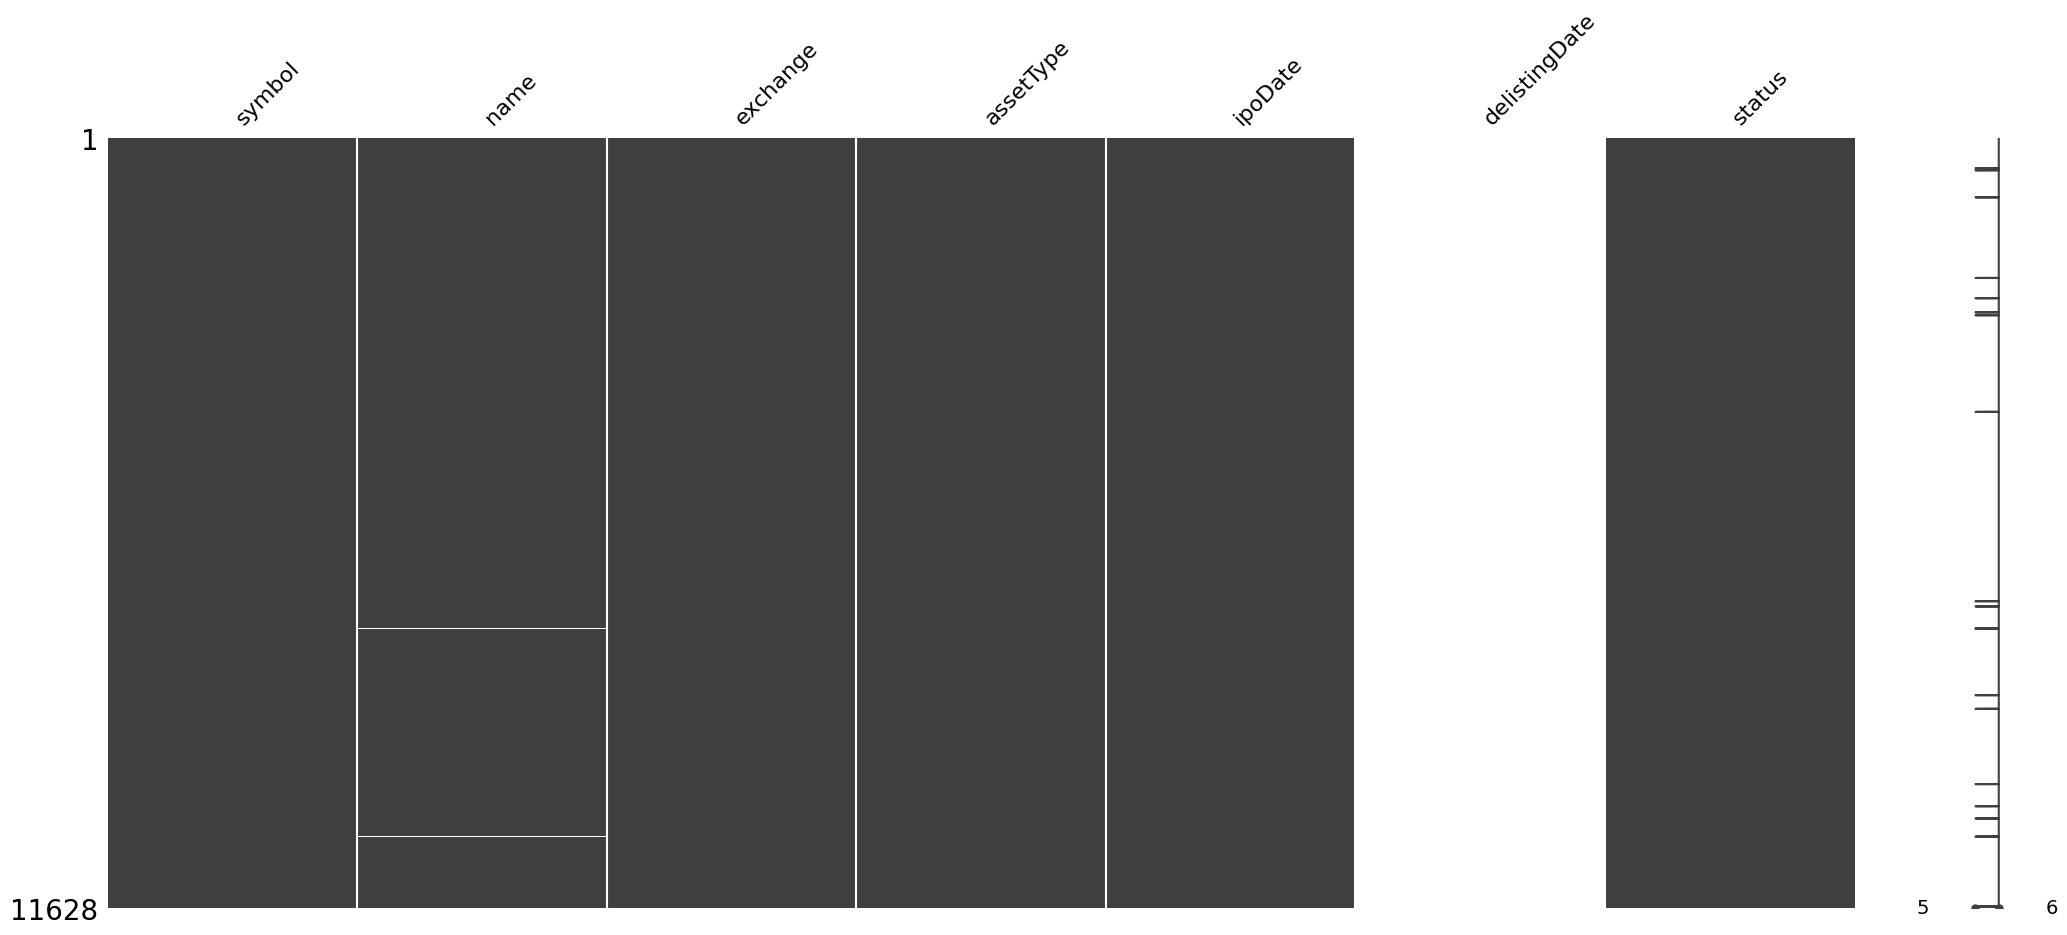

In [17]:
import missingno as msno
msno.matrix(df)

Vamos corrigir esses tipos para lidar melhor com essas informações:

In [100]:
df['ipoDate'] = pd.to_datetime(df['ipoDate'], format='%Y-%m-%d')
df['delistingDate'] = pd.to_datetime(df['delistingDate'], format='%Y-%m-%d')
df['assetType'] = df['assetType'].astype('category')
df['exchange'] = df['exchange'].astype('category')
df['name'] = df['name'].astype('string')

In [101]:
df.dtypes

symbol                   object
name             string[python]
exchange               category
assetType              category
ipoDate          datetime64[ns]
delistingDate    datetime64[ns]
status                   object
dtype: object

In [102]:
df.head(5)

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
0,A,Agilent Technologies Inc,NYSE,Stock,1999-11-18,NaT,Active
1,AA,Alcoa Corp,NYSE,Stock,2016-10-18,NaT,Active
2,AAA,ALTERNATIVE ACCESS FIRST PRIORITY CLO BOND ETF,NYSE ARCA,ETF,2020-09-09,NaT,Active
3,AAAU,Goldman Sachs Physical Gold ETF,BATS,ETF,2018-08-15,NaT,Active
4,AACG,ATA Creativity Global,NASDAQ,Stock,2008-01-29,NaT,Active


## Integração dos Dados

Para cada linha com nome nulo, vamos recuperar essa informação com a função do Yahoo Finance. Para as que não forem possíveis de recuperar, vamos excluir essas linhas:

In [87]:
df['name'] = df.apply(lambda x: get_finance_data_name(x.symbol) if pd.isna(x['name']) or x['name'] == '' else x.name, axis=1)

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/AMEH?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=AMEH&crumb=e7gfjb3I379
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DFFN?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=DFFN&crumb=e7gfjb3I379
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NTEST-G?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=NTEST-G&crumb=e7gfjb3I379
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/NTEST-J?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=fin

In [93]:
df.dropna(subset=['name', 'symbol'], inplace=True)
df.drop(df[df.name == ''].index, inplace=True)

In [94]:
df.shape

(11593, 7)

**Podemos reformatar o delistingDate para que não haja mais valores nulos:**

In [95]:
df.fillna({'delistingDate':'N/A'}, inplace=True)

**Vejamos agora como ficou o nosso dataset:**

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11593 entries, 0 to 11627
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   symbol         11593 non-null  object
 1   name           11593 non-null  object
 2   exchange       11593 non-null  object
 3   assetType      11593 non-null  object
 4   ipoDate        11593 non-null  object
 5   delistingDate  11593 non-null  object
 6   status         11593 non-null  object
dtypes: object(7)
memory usage: 724.6+ KB


<Axes: >

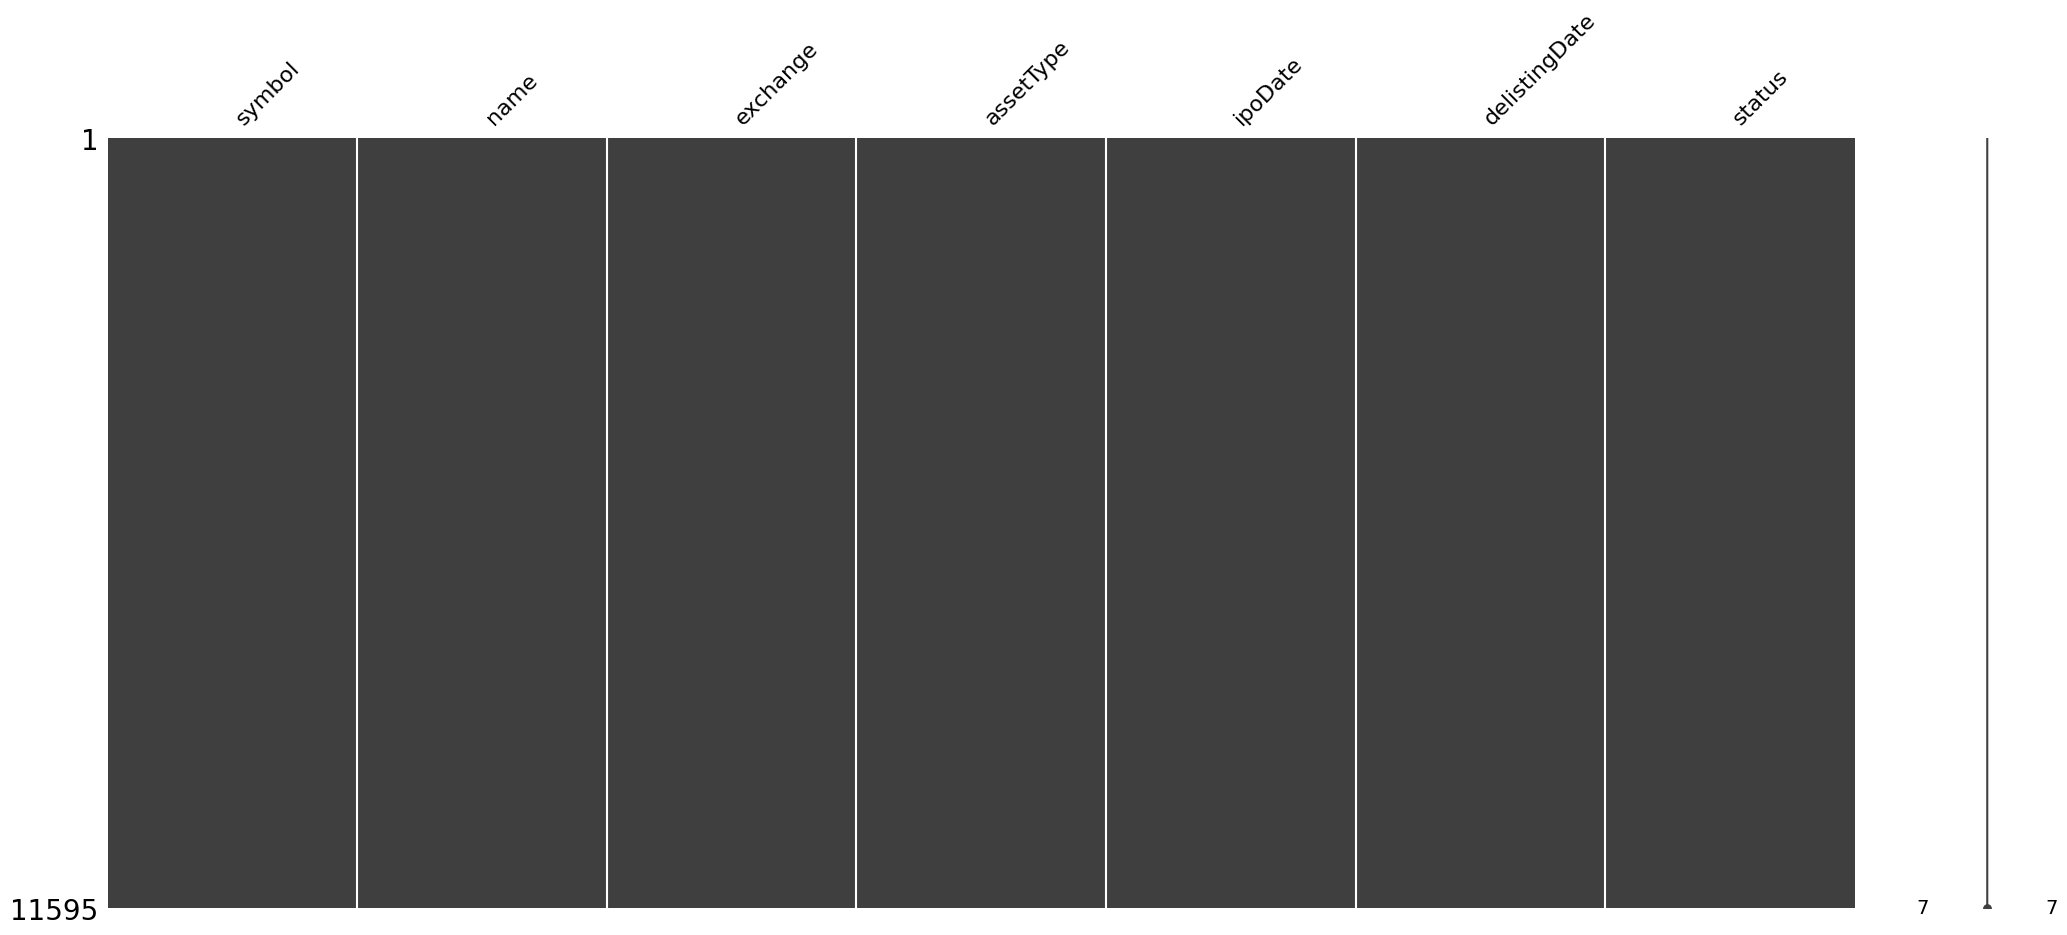

In [25]:
msno.matrix(df)

Agora vamos integrar à nossa base de dados informações sobre os dividendos pagos pelas empresas e ETF's nos últimos 5 anos:

In [13]:
def get_dividends_by_period(period, symbol):
    try: 
        return yf.Ticker(symbol).history(period=period).Dividends.sum() # 1d, 1w, 1m, 3m, 6m, 5y, 10y, ytd, max
    except:
        return 0

In [14]:
get_dividends_by_period('5y', 'AAPL')

np.float64(4.58)

## Redução e Validação dos Dados

Vamos extrair uma amostra aleatória para iniciar a comparação do desempenho nominal dos dividendos dos últimos 5 anos entre as bolsas.

In [26]:
sample_df = df.sample(n=25)
sample_df

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
7730,OPAL,7730,NASDAQ,Stock,2022-07-22,N/A,Active
1571,BTAI,1571,NASDAQ,Stock,2018-03-08,N/A,Active
936,AYI,936,NYSE,Stock,2001-12-03,N/A,Active
7502,NVR,7502,NYSE,Stock,1985-07-22,N/A,Active
7066,MYO,7066,NYSE MKT,Stock,2017-06-12,N/A,Active
2998,DYN,2998,NASDAQ,Stock,2020-09-17,N/A,Active
1566,BSVN,1566,NASDAQ,Stock,2018-09-20,N/A,Active
6731,MIDU,6731,NYSE ARCA,ETF,2009-01-08,N/A,Active
1726,CANC,1726,NASDAQ,ETF,2021-09-30,N/A,Active
3695,FENG,3695,NYSE,Stock,2011-05-16,N/A,Active


In [27]:
sample_df['dividends_last_5_years'] = sample_df.apply(lambda x: get_dividends_by_period('5y', x.symbol), axis=1)
sample_df

,symbol,name,exchange,assetType,ipoDate,delistingDate,status,dividends_last_5_years
7730,OPAL,7730,NASDAQ,Stock,2022-07-22,N/A,Active,0.000
1571,BTAI,1571,NASDAQ,Stock,2018-03-08,N/A,Active,0.000
936,AYI,936,NYSE,Stock,2001-12-03,N/A,Active,2.720
7502,NVR,7502,NYSE,Stock,1985-07-22,N/A,Active,0.000
7066,MYO,7066,NYSE MKT,Stock,2017-06-12,N/A,Active,0.000
2998,DYN,2998,NASDAQ,Stock,2020-09-17,N/A,Active,0.000
1566,BSVN,1566,NASDAQ,Stock,2018-09-20,N/A,Active,3.020
6731,MIDU,6731,NYSE ARCA,ETF,2009-01-08,N/A,Active,1.272
1726,CANC,1726,NASDAQ,ETF,2021-09-30,N/A,Active,0.877
3695,FENG,3695,NYSE,Stock,2011-05-16,N/A,Active,8.226


Como a amostra aleatória trouxe muitas empresas novas, sem histórico de dividendos mínimo consistente para a nossa análise, vamos tentar refinar nossa amostra. Antes, vamos verificar a proporção de ativos por exchange e por tipo:

In [28]:
rate_exchange = df.exchange.value_counts(normalize=True)
rate_exchange

exchange
NASDAQ       0.447176
NYSE         0.263131
NYSE ARCA    0.192842
BATS         0.068650
NYSE MKT     0.028202
Name: proportion, dtype: float64

In [29]:
rate_asset = df.assetType.value_counts(normalize=True)
rate_asset

assetType
Stock    0.644761
ETF      0.355239
Name: proportion, dtype: float64

Para fins de simplificação, vamos deixar somente as exchanges mais conhecidas e verificar a proporção novamente:

In [30]:
df.drop(df[df.exchange == 'NYSE ARCA'].index, inplace=True)
df.drop(df[df.exchange == 'NYSE MKT'].index, inplace=True)
df.drop(df[df.exchange == 'BATS'].index, inplace=True)

In [31]:
rate_exchange = df.exchange.value_counts(normalize=True)
rate_exchange

exchange
NASDAQ       0.629553
NYSE         0.370447
BATS         0.000000
NYSE ARCA    0.000000
NYSE MKT     0.000000
Name: proportion, dtype: float64

Agora vamos extrair uma amostra obedecendo essas proporções:

In [32]:
exchange_sample = df.groupby('exchange').apply(lambda x: x.sample(int(10 * rate_exchange[x.name]))).droplevel('exchange')
exchange_sample

C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_21740\2489681502.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exchange_sample = df.groupby('exchange').apply(lambda x: x.sample(int(10 * rate_exchange[x.name]))).droplevel('exchange')
C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_21740\2489681502.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  exchange_sample = df.groupby('exchange').apply(lambda x: x.sample(int(10 * rate_exchange[x.name]))).droplevel('exchange')


,symbol,name,exchange,assetType,ipoDate,delistingDate,status
1310,BKYI,1310,NASDAQ,Stock,2002-02-21,N/A,Active
2257,CORT,2257,NASDAQ,Stock,2004-04-14,N/A,Active
9664,SPAQ,9664,NASDAQ,ETF,2021-04-01,N/A,Active
10567,UFCS,10567,NASDAQ,Stock,1990-03-26,N/A,Active
632,ARBKL,632,NASDAQ,Stock,2021-11-18,N/A,Active
2102,CLRCU,2102,NASDAQ,Stock,2022-04-28,N/A,Active
6361,LPL,6361,NYSE,Stock,2004-07-22,N/A,Active
6344,LOMA,6344,NYSE,Stock,2017-11-01,N/A,Active
7776,OSCR,7776,NYSE,Stock,2021-03-03,N/A,Active


In [33]:
asset_sample = df.groupby('assetType').apply(lambda x: x.sample(int(10 * rate_asset[x.name]))).droplevel('assetType')
asset_sample

C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_21740\3961626324.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asset_sample = df.groupby('assetType').apply(lambda x: x.sample(int(10 * rate_asset[x.name]))).droplevel('assetType')
C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_21740\3961626324.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  asset_sample = df.groupby('assetType').apply(lambda x: x.sample(int(10 * rate_asset[x.name]))).droplevel('assetType')


,symbol,name,exchange,assetType,ipoDate,delistingDate,status
3832,FLDB,3832,NASDAQ,ETF,2024-02-26,N/A,Active
10429,TSLL,10429,NASDAQ,ETF,2022-08-09,N/A,Active
10802,VCV,10802,NYSE,ETF,1994-10-27,N/A,Active
6462,LXU,6462,NYSE,Stock,1980-01-02,N/A,Active
7991,PEBO,7991,NASDAQ,Stock,1993-02-11,N/A,Active
1869,CECO,1869,NASDAQ,Stock,1992-09-29,N/A,Active
1878,CELG-R,1878,NYSE,Stock,2019-12-02,N/A,Active
7671,OKLO,7671,NYSE,Stock,2021-07-08,N/A,Active
1836,CDAQ,1836,NASDAQ,Stock,2021-12-06,N/A,Active


Para comparar dividendos, vamos adicionar as informações como anteriormente, em cada sample:

In [34]:
exchange_sample['dividends_last_5_years'] = exchange_sample.apply(lambda x: get_dividends_by_period('5y', x.symbol), axis=1)
exchange_sample


,symbol,name,exchange,assetType,ipoDate,delistingDate,status,dividends_last_5_years
1310,BKYI,1310,NASDAQ,Stock,2002-02-21,N/A,Active,0.000
2257,CORT,2257,NASDAQ,Stock,2004-04-14,N/A,Active,0.000
9664,SPAQ,9664,NASDAQ,ETF,2021-04-01,N/A,Active,5.478
10567,UFCS,10567,NASDAQ,Stock,1990-03-26,N/A,Active,3.480
632,ARBKL,632,NASDAQ,Stock,2021-11-18,N/A,Active,6.564
2102,CLRCU,2102,NASDAQ,Stock,2022-04-28,N/A,Active,0.000
6361,LPL,6361,NYSE,Stock,2004-07-22,N/A,Active,0.000
6344,LOMA,6344,NYSE,Stock,2017-11-01,N/A,Active,1.038
7776,OSCR,7776,NYSE,Stock,2021-03-03,N/A,Active,0.000


In [35]:
asset_sample['dividends_last_5_years'] = asset_sample.apply(lambda x: get_dividends_by_period('5y', x.symbol), axis=1)
asset_sample

$CELG-R: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
$CDAQ: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")


,symbol,name,exchange,assetType,ipoDate,delistingDate,status,dividends_last_5_years
3832,FLDB,3832,NASDAQ,ETF,2024-02-26,N/A,Active,2.366
10429,TSLL,10429,NASDAQ,ETF,2022-08-09,N/A,Active,1.416
10802,VCV,10802,NYSE,ETF,1994-10-27,N/A,Active,2.740
6462,LXU,6462,NYSE,Stock,1980-01-02,N/A,Active,0.000
7991,PEBO,7991,NASDAQ,Stock,1993-02-11,N/A,Active,7.500
1869,CECO,1869,NASDAQ,Stock,1992-09-29,N/A,Active,0.000
1878,CELG-R,1878,NYSE,Stock,2019-12-02,N/A,Active,0.000
7671,OKLO,7671,NYSE,Stock,2021-07-08,N/A,Active,0.000
1836,CDAQ,1836,NASDAQ,Stock,2021-12-06,N/A,Active,0.000


Numa outra tentativa, vamos montar uma amostra de conglomerados, considerando empresas listadas entre 5 e 10 anos:

In [103]:
five_year_df = df[df.ipoDate.dt.year.between(2014, 2024)]
five_year_df

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
1,AA,Alcoa Corp,NYSE,Stock,2016-10-18,NaT,Active
2,AAA,ALTERNATIVE ACCESS FIRST PRIORITY CLO BOND ETF,NYSE ARCA,ETF,2020-09-09,NaT,Active
3,AAAU,Goldman Sachs Physical Gold ETF,BATS,ETF,2018-08-15,NaT,Active
5,AACT,Ares Acquisition Corporation II - Class A,NYSE,Stock,2023-06-12,NaT,Active
6,AACT-U,Ares Acquisition Corporation II - Units (1 Ord...,NYSE,Stock,2023-04-21,NaT,Active
...,...,...,...,...,...,...,...
11621,ZXYZ-A,NASDAQ SYMBOLOGY TEST,NASDAQ,Stock,2016-01-19,NaT,Active
11623,ZYME,Zymeworks BC Inc,NASDAQ,Stock,2017-04-28,NaT,Active
11624,ZYNE,Zynerba Pharmaceuticals Inc,NASDAQ,Stock,2015-08-05,NaT,Active
11626,ZZK,<NA>,NYSE ARCA,Stock,2020-07-22,NaT,Active


In [104]:
five_year_rate = five_year_df.ipoDate.dt.year.value_counts(normalize=True)
five_year_rate

ipoDate
2021    0.216911
2023    0.126027
2022    0.121179
2024    0.107177
2020    0.100714
2019    0.066918
2018    0.063013
2017    0.061128
2014    0.050088
2016    0.045914
2015    0.040932
Name: proportion, dtype: float64

In [105]:
five_year = five_year_rate.sample(5)
five_year

ipoDate
2023    0.126027
2015    0.040932
2021    0.216911
2014    0.050088
2018    0.063013
Name: proportion, dtype: float64

In [106]:
five_year_df.drop(five_year_df[five_year_df.ipoDate.dt.year.isin([2016,2017,2019,2020,2022,2024])].index, inplace=True)
five_year_df

C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_21740\2742569993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_year_df.drop(five_year_df[five_year_df.ipoDate.dt.year.isin([2016,2017,2019,2020,2022,2024])].index, inplace=True)


,symbol,name,exchange,assetType,ipoDate,delistingDate,status
3,AAAU,Goldman Sachs Physical Gold ETF,BATS,ETF,2018-08-15,NaT,Active
5,AACT,Ares Acquisition Corporation II - Class A,NYSE,Stock,2023-06-12,NaT,Active
6,AACT-U,Ares Acquisition Corporation II - Units (1 Ord...,NYSE,Stock,2023-04-21,NaT,Active
7,AACT-WS,Ares Acquisition Corporation II - Warrants (01...,NYSE,Stock,2023-06-12,NaT,Active
10,AAGR,African Agriculture Holdings Inc,NASDAQ,Stock,2023-12-07,NaT,Active
...,...,...,...,...,...,...,...
11613,ZURA,Zura Bio Ltd - Class A,NASDAQ,Stock,2021-09-03,NaT,Active
11614,ZVIA,Zevia PBC - Class A,NYSE,Stock,2021-07-22,NaT,Active
11615,ZVRA,Zevra Therapeutics Inc,NASDAQ,Stock,2015-04-16,NaT,Active
11624,ZYNE,Zynerba Pharmaceuticals Inc,NASDAQ,Stock,2015-08-05,NaT,Active


In [107]:
five_year_rate = five_year_df.ipoDate.dt.year.value_counts(normalize=True)
five_year_rate

ipoDate
2021    0.436467
2023    0.253590
2018    0.126795
2014    0.100786
2015    0.082363
Name: proportion, dtype: float64

In [108]:
five_year_sample = five_year_df.groupby(five_year_df.ipoDate.dt.year).apply(lambda x: x.sample(int(30 * five_year[x.name]))).droplevel('ipoDate')
five_year_sample

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
1562,BST,BlackRock Science and Technology Trust,NYSE,ETF,2014-10-29,NaT,Active
4718,HAWX,ISHARES CURRENCY HEDGED MSCI ACWI EX U.S. ETF,NYSE ARCA,ETF,2015-07-01,NaT,Active
11233,WOMN,Impact Shares YWCA Womens Empowerment ETF,NYSE ARCA,ETF,2018-08-28,NaT,Active
6413,LTH,Life Time Group Holdings Inc,NYSE,Stock,2021-10-07,NaT,Active
9202,SCHW-P-J,Charles Schwab Corp,NYSE,Stock,2021-03-24,NaT,Active
5615,IVVD,Invivyd Inc,NASDAQ,Stock,2021-08-06,NaT,Active
9656,SOXQ,INVESCO PHLX SEMICONDUCTOR ETF,NASDAQ,ETF,2021-06-11,NaT,Active
1387,BNDD,QUADRATIC DEFLATION ETF,NYSE ARCA,ETF,2021-09-21,NaT,Active
10399,TRTN-P-E,Triton International Ltd,NYSE,Stock,2021-08-12,NaT,Active
9990,SXTPW,60 Degrees Pharmaceuticals Inc - Warrants (16/...,NASDAQ,Stock,2023-07-12,NaT,Active


In [109]:
five_year_sample['dividends_last_5_years'] = five_year_sample.apply(lambda x: get_dividends_by_period('5y', x.symbol), axis=1)
five_year_sample


$SCHW-P-J: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
$TRTN-P-E: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")


,symbol,name,exchange,assetType,ipoDate,delistingDate,status,dividends_last_5_years
1562,BST,BlackRock Science and Technology Trust,NYSE,ETF,2014-10-29,NaT,Active,15.560199
4718,HAWX,ISHARES CURRENCY HEDGED MSCI ACWI EX U.S. ETF,NYSE ARCA,ETF,2015-07-01,NaT,Active,7.691000
11233,WOMN,Impact Shares YWCA Womens Empowerment ETF,NYSE ARCA,ETF,2018-08-28,NaT,Active,6.146000
6413,LTH,Life Time Group Holdings Inc,NYSE,Stock,2021-10-07,NaT,Active,0.000000
9202,SCHW-P-J,Charles Schwab Corp,NYSE,Stock,2021-03-24,NaT,Active,0.000000
5615,IVVD,Invivyd Inc,NASDAQ,Stock,2021-08-06,NaT,Active,0.000000
9656,SOXQ,INVESCO PHLX SEMICONDUCTOR ETF,NASDAQ,ETF,2021-06-11,NaT,Active,1.052000
1387,BNDD,QUADRATIC DEFLATION ETF,NYSE ARCA,ETF,2021-09-21,NaT,Active,8.018000
10399,TRTN-P-E,Triton International Ltd,NYSE,Stock,2021-08-12,NaT,Active,0.000000
9990,SXTPW,60 Degrees Pharmaceuticals Inc - Warrants (16/...,NASDAQ,Stock,2023-07-12,NaT,Active,0.000000


## Nova seção: Classificando os Dados

Podemos usar stack e unstack para constituir dados em formato longo. Se, por exemplo, optarmos por hierarquia baseada no tipo de ativo ou qual bolsa está alocado cada ativo, teríamos: 

In [39]:
new_sample = df.sample(n=25)
new_sample

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
8973,RRC,8973,NYSE,Stock,1992-12-28,N/A,Active
10759,UZF,10759,NYSE,Stock,2021-05-26,N/A,Active
6570,MCAGU,6570,NASDAQ,Stock,2021-11-12,N/A,Active
9495,SLN,9495,NASDAQ,Stock,2020-09-08,N/A,Active
9490,SLGL,9490,NASDAQ,Stock,2018-02-01,N/A,Active
7820,OXLC,7820,NASDAQ,ETF,2011-01-21,N/A,Active
1456,BPOP,1456,NASDAQ,Stock,1990-03-26,N/A,Active
6800,MMC,6800,NYSE,Stock,1987-12-30,N/A,Active
1157,BFIN,1157,NASDAQ,Stock,2005-06-28,N/A,Active
2189,CNSL,2189,NASDAQ,Stock,2005-07-22,N/A,Active


In [40]:
new_sample.sort_values(by=['exchange', 'assetType'], inplace=True)
new_sample


,symbol,name,exchange,assetType,ipoDate,delistingDate,status
7820,OXLC,7820,NASDAQ,ETF,2011-01-21,N/A,Active
8018,PEY,8018,NASDAQ,ETF,2004-12-09,N/A,Active
287,AIA,287,NASDAQ,ETF,2007-11-20,N/A,Active
10426,TSL,10426,NASDAQ,ETF,2022-08-09,N/A,Active
6570,MCAGU,6570,NASDAQ,Stock,2021-11-12,N/A,Active
9495,SLN,9495,NASDAQ,Stock,2020-09-08,N/A,Active
9490,SLGL,9490,NASDAQ,Stock,2018-02-01,N/A,Active
1456,BPOP,1456,NASDAQ,Stock,1990-03-26,N/A,Active
1157,BFIN,1157,NASDAQ,Stock,2005-06-28,N/A,Active
2189,CNSL,2189,NASDAQ,Stock,2005-07-22,N/A,Active


In [55]:
new_sample.set_index(['exchange', 'assetType'])

symbol   name    ipoDate delistingDate  status  \
exchange assetType                                                    
NASDAQ   ETF           OXLC   7820 2011-01-21           N/A  Active   
         ETF            PEY   8018 2004-12-09           N/A  Active   
         ETF            AIA    287 2007-11-20           N/A  Active   
         ETF            TSL  10426 2022-08-09           N/A  Active   
         Stock        MCAGU   6570 2021-11-12           N/A  Active   
         Stock          SLN   9495 2020-09-08           N/A  Active   
         Stock         SLGL   9490 2018-02-01           N/A  Active   
         Stock         BPOP   1456 1990-03-26           N/A  Active   
         Stock         BFIN   1157 2005-06-28           N/A  Active   
         Stock         CNSL   2189 2005-07-22           N/A  Active   
         Stock         TOYO  10332 2024-07-01           N/A  Active   
         Stock          CSX   2408 1980-11-03           N/A  Active   
         Stock         BYNO   1676 2022-04-05           N/A  Active   
         Stock         YMAB  11510 2018-09-21           N/A  Active   
         Stock         CSGS   2381 1996-02-28           N/A  Active   
         Stock         GYRE   4691 2006-04-12           N/A  Active   
         Stock         CDXC   1862 2008-07-15           N/A  Active   
NYSE     ETF            SCD   9174 2004-02-25           N/A  Active   
         ETF            CAF   1708 2006-09-28           N/A  Active   
         Stock          RRC   8973 1992-12-28           N/A  Active   
         Stock          UZF  10759 2021-05-26           N/A  Active   
         Stock          MMC   6800 1987-12-30           N/A  Active   
         Stock          FHN   3754 1990-03-26           N/A  Active   
         Stock          NOA   7313 2006-11-22           N/A  Active   
         Stock      GNL-P-B   4474 2019-11-21           N/A  Active   

                    dividends_last_5_years  
exchange assetType                          
NASDAQ   ETF                      4.749000  
         ETF                      4.360000  
         ETF                      7.016000  
         ETF                      6.657000  
         Stock                    0.000000  
         Stock                    0.000000  
         Stock                    0.000000  
         Stock                    9.980000  
         Stock                    2.000000  
         Stock                    0.000000  
         Stock                    0.000000  
         Stock                    2.082667  
         Stock                    0.000000  
         Stock                    0.000000  
         Stock                    5.405000  
         Stock                   25.050000  
         Stock                    0.000000  
NYSE     ETF                      6.051000  
         ETF                      4.097000  
         Stock                    0.890000  
         Stock                    5.209000  
         Stock                   12.100000  
         Stock                    3.000000  
         Stock                    0.981000  
         Stock                    0.000000

In [44]:
new_sample_stacked = new_sample.stack()
new_sample_stacked

7820  symbol                          OXLC
      name                            7820
      exchange                      NASDAQ
      assetType                        ETF
      ipoDate          2011-01-21 00:00:00
                              ...         
4474  exchange                        NYSE
      assetType                      Stock
      ipoDate          2019-11-21 00:00:00
      delistingDate                    N/A
      status                        Active
Length: 175, dtype: object

In [45]:
new_sample_unstacked = new_sample_stacked.unstack()
new_sample_unstacked

,symbol,name,exchange,assetType,ipoDate,delistingDate,status
7820,OXLC,7820,NASDAQ,ETF,2011-01-21 00:00:00,N/A,Active
8018,PEY,8018,NASDAQ,ETF,2004-12-09 00:00:00,N/A,Active
287,AIA,287,NASDAQ,ETF,2007-11-20 00:00:00,N/A,Active
10426,TSL,10426,NASDAQ,ETF,2022-08-09 00:00:00,N/A,Active
6570,MCAGU,6570,NASDAQ,Stock,2021-11-12 00:00:00,N/A,Active
9495,SLN,9495,NASDAQ,Stock,2020-09-08 00:00:00,N/A,Active
9490,SLGL,9490,NASDAQ,Stock,2018-02-01 00:00:00,N/A,Active
1456,BPOP,1456,NASDAQ,Stock,1990-03-26 00:00:00,N/A,Active
1157,BFIN,1157,NASDAQ,Stock,2005-06-28 00:00:00,N/A,Active
2189,CNSL,2189,NASDAQ,Stock,2005-07-22 00:00:00,N/A,Active


In [53]:
new_sample['dividends_last_5_years'] = new_sample.apply(lambda x: get_dividends_by_period('5y', x.symbol), axis=1)
new_sample

$CNSL: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")
$GNL-P-B: possibly delisted; no price data found  (period=5y) (Yahoo error = "No data found, symbol may be delisted")


,symbol,name,exchange,assetType,ipoDate,delistingDate,status,dividends_last_5_years
7820,OXLC,7820,NASDAQ,ETF,2011-01-21,N/A,Active,4.749000
8018,PEY,8018,NASDAQ,ETF,2004-12-09,N/A,Active,4.360000
287,AIA,287,NASDAQ,ETF,2007-11-20,N/A,Active,7.016000
10426,TSL,10426,NASDAQ,ETF,2022-08-09,N/A,Active,6.657000
6570,MCAGU,6570,NASDAQ,Stock,2021-11-12,N/A,Active,0.000000
9495,SLN,9495,NASDAQ,Stock,2020-09-08,N/A,Active,0.000000
9490,SLGL,9490,NASDAQ,Stock,2018-02-01,N/A,Active,0.000000
1456,BPOP,1456,NASDAQ,Stock,1990-03-26,N/A,Active,9.980000
1157,BFIN,1157,NASDAQ,Stock,2005-06-28,N/A,Active,2.000000
2189,CNSL,2189,NASDAQ,Stock,2005-07-22,N/A,Active,0.000000


Para ter uma visão mais sucinta desses dados, podemos aplicar Pivot Table:

In [ ]:
five_year_sample_pivot = five_year_sample.pivot(columns='assetType', index='exchange', values='dividends_last_5_years').reset_index()
five_year_sample_pivot

TypeError: DataFrame.pivot() got an unexpected keyword argument 'aggfunc'

In [111]:
five_year_sample.drop(five_year_sample[five_year_sample.exchange == 'NYSE ARCA'].index, inplace=True)
five_year_sample.drop(five_year_sample[five_year_sample.exchange == 'NYSE MKT'].index, inplace=True)
five_year_sample.drop(five_year_sample[five_year_sample.exchange == 'BATS'].index, inplace=True)
five_year_sample.sort_values(by=['exchange', 'assetType']).set_index(['exchange', 'assetType'])

symbol  \
exchange assetType             
NASDAQ   ETF            SOXQ   
         Stock          IVVD   
         Stock         SXTPW   
         Stock          ENGN   
         Stock          ALTI   
NYSE     ETF             BST   
         Stock           LTH   
         Stock      SCHW-P-J   
         Stock      TRTN-P-E   

                                                                 name  \
exchange assetType                                                      
NASDAQ   ETF                          INVESCO PHLX SEMICONDUCTOR ETF    
         Stock                                            Invivyd Inc   
         Stock      60 Degrees Pharmaceuticals Inc - Warrants (16/...   
         Stock                                    enGene Holdings Inc   
         Stock                              AlTi Global Inc - Class A   
NYSE     ETF                   BlackRock Science and Technology Trust   
         Stock                           Life Time Group Holdings Inc   
         Stock                                    Charles Schwab Corp   
         Stock                               Triton International Ltd   

                      ipoDate delistingDate  status  dividends_last_5_years  
exchange assetType                                                           
NASDAQ   ETF       2021-06-11           NaT  Active                1.052000  
         Stock     2021-08-06           NaT  Active                0.000000  
         Stock     2023-07-12           NaT  Active                0.000000  
         Stock     2023-11-01           NaT  Active                0.000000  
         Stock     2023-01-03           NaT  Active                0.000000  
NYSE     ETF       2014-10-29           NaT  Active               15.560199  
         Stock     2021-10-07           NaT  Active                0.000000  
         Stock     2021-03-24           NaT  Active                0.000000  
         Stock     2021-08-12           NaT  Active                0.000000

In [113]:
five_year_sample_pivot = five_year_sample.pivot_table(columns='assetType', index='exchange', values='dividends_last_5_years', aggfunc=['sum', 'mean', 'max', 'min'])
five_year_sample_pivot.dropna()

C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_21740\718358647.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  five_year_sample_pivot = five_year_sample.pivot_table(columns='assetType', index='exchange', values='dividends_last_5_years', aggfunc=['sum', 'mean', 'max', 'min'])
C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_21740\718358647.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  five_year_sample_pivot = five_year_sample.pivot_table(columns='assetType', index='exchange', values='dividends_last_5_years', aggfunc=['sum', 'mean', 'max', 'min'])
C:\Users\premier-improvement\AppData\Local\Temp\ipykernel_21740\718358647.py:1: FutureWarn

sum             mean              max              min      
assetType        ETF Stock        ETF Stock        ETF Stock        ETF Stock
exchange                                                                     
NASDAQ      1.052000   0.0   1.052000   0.0   1.052000   0.0   1.052000   0.0
NYSE       15.560199   0.0  15.560199   0.0  15.560199   0.0  15.560199   0.0

## Nova seção: Revisão de filtros, loc e iloc

In [116]:
five_year_sample[(five_year_sample.dividends_last_5_years > 0) & (five_year_sample.exchange == 'NYSE')].sort_values(by='dividends_last_5_years', ascending=False)

,symbol,name,exchange,assetType,ipoDate,delistingDate,status,dividends_last_5_years
1562,BST,BlackRock Science and Technology Trust,NYSE,ETF,2014-10-29,NaT,Active,15.560199


In [118]:
five_year_sample.loc[(five_year_sample.dividends_last_5_years > 0) & (five_year_sample.exchange == 'NYSE'), 'name']

1562    BlackRock Science and Technology Trust
Name: name, dtype: string

In [120]:
five_year_sample.iloc[8, 1]

'AlTi Global Inc - Class A'